In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
df = pd.read_csv("df_final.csv")
df

,country,code,year,stress,agriculture_water,industry_water,domestic_water,water_per_capita,urban_population,state_capacity,cattle,total_withdrawals,cereal_yield,control_of_corruption,hydro_electricity,permanent_cropland,population_density,ln_stress
0,Afghanistan,AFG,2000,54.76,0.989050,0.006161,0.004577,0.007439,0.150751,0.213500,0.016537,0.030923,0.021020,0.133944,0.320168,0.005931,0.003636,4.002960
1,Afghanistan,AFG,2001,54.76,0.988170,0.006562,0.005056,0.007384,0.151743,0.195108,0.014174,0.030923,0.026476,0.143635,0.320168,0.005985,0.003665,4.002960
2,Afghanistan,AFG,2002,54.76,0.987291,0.006961,0.005535,0.006922,0.152745,0.185438,0.019679,0.030923,0.044531,0.138723,0.320168,0.005985,0.003922,4.002960
3,Afghanistan,AFG,2003,54.76,0.986414,0.007360,0.006013,0.006419,0.153748,0.096132,0.017978,0.030923,0.038764,0.117124,0.320168,0.005985,0.004245,4.002960
4,Afghanistan,AFG,2004,54.76,0.985538,0.007758,0.006489,0.006171,0.155350,0.091771,0.019585,0.030923,0.035409,0.115623,0.320168,0.005985,0.004424,4.002960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,Zimbabwe,ZWE,2011,32.70,0.807948,0.042543,0.149057,0.002896,0.269950,0.444841,0.072318,0.005297,0.015060,0.098218,0.564251,0.009032,0.004111,3.487375
2392,Zimbabwe,ZWE,2012,32.49,0.804082,0.037965,0.157488,0.002844,0.267977,0.454824,0.072518,0.005264,0.018008,0.108391,0.585590,0.009032,0.004190,3.480932
2393,Zimbabwe,ZWE,2013,32.28,0.800167,0.033329,0.166025,0.002783,0.266016,0.448678,0.072593,0.005230,0.017268,0.099601,0.521946,0.009032,0.004286,3.474448
2394,Zimbabwe,ZWE,2014,32.08,0.796202,0.028634,0.174672,0.002722,0.264381,0.488320,0.059065,0.005197,0.021703,0.103153,0.541594,0.009032,0.004386,3.468233


## Test Linearity Assumption

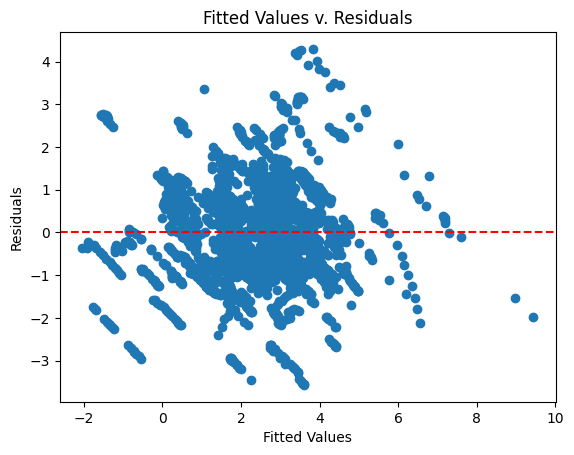

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_stress   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     267.2
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:25:56   Log-Likelihood:                -3806.8
No. Observations:                2396   AIC:                             7642.
Df Residuals:                    2382   BIC:                             7723.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.1102      0.684     -0.161      0.872      -1.452       1.232
agriculture_water         3.4094      0.675      5.054      0.000       2.086       4.732
industry_water            1.4726      0.678      2.173      0.030       0.144       2.801
domestic_water           -0.7583      0.657     -1.153      0.249      -2.047       0.531
water_per_capita         -5.2154      0.233    -22.379      0.000      -5.672      -4.758
urban_population          1.6592      0.137     12.116      0.000       1.391       1.928
state_capacity           -0.2122      0.302     -0.703      0.482      -0.804       0.380
cattle                   -1.8940      0.316     -5.993      0.000      -2.514      -1.274
total_withdrawals         1.9705      0.376      5.243      0.000       1.233       2.708
cereal_yield              7.1126      0.405     17.555      0.000       6.318       7.907
control_of_corruption    -0.0206      0.220     -0.094      0.925      -0.453       0.411
hydro_electricity        -1.5980      0.104    -15.372      0.000      -1.802      -1.394
permanent_cropland       -1.1674      0.162     -7.211      0.000      -1.485      -0.850
population_density        4.5679      0.350     13.067      0.000       3.882       5.253
==============================================================================
Omnibus:                       48.052   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.706
Skew:                           0.241   Prob(JB):                     8.90e-15
Kurtosis:                       3.644   Cond. No.                         82.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
model_all_data = smf.ols(formula = 'ln_stress~agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df).fit()
plt.scatter(model_all_data.fittedvalues, model_all_data.resid)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values v. Residuals')
plt.show()
model_all_data.summary()

In [11]:
features_matrix = df[['year', 'agriculture_water',
       'industry_water', 'domestic_water', 'water_per_capita',
       'urban_population', 'state_capacity', 'cattle', 'total_withdrawals',
       'cereal_yield', 'control_of_corruption', 'hydro_electricity',
       'permanent_cropland', 'population_density']]

target_array = df['ln_stress']

## Non-Regularized Linear Regression

In [31]:
model_1 = LinearRegression()
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
test_fold_r2 = cross_val_score(model_1, features_matrix, target_array, cv=cross_val, scoring="r2")
print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

Test fold R^2 Values: [0.59364218 0.58587946 0.60210839 0.58657747 0.58875439]
Test fold R^2 Mean: 0.5913923783541137
Test fold R^2 STD: 0.006007149214180546


## LASSO Regression

,Lambda,Mean Test R^2
0,0.0,0.591392


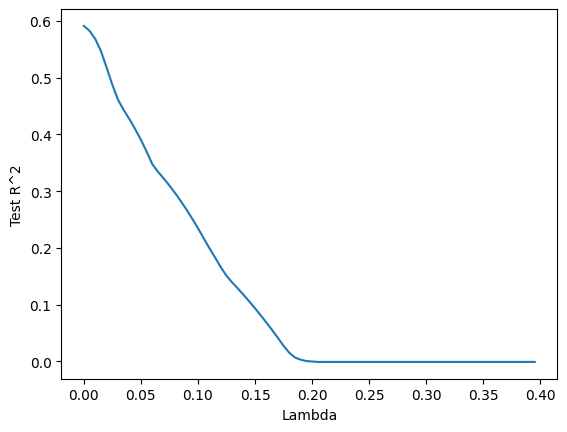

In [13]:
# LASSO Model with Cross Validation
data = []
for i in np.arange(0.0,0.4,0.005):
    temp_model = Lasso(i, max_iter=1000)
    cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
    test_fold_r2 = cross_val_score(temp_model, features_matrix, target_array, cv=cross_val, scoring="r2")
    data.append([i, test_fold_r2.mean()])
results_lasso = pd.DataFrame(data, columns=['Lambda', "Mean Test R^2"])
plt.plot(results_lasso['Lambda'].values, results_lasso['Mean Test R^2'].values)
plt.xlabel("Lambda")
plt.ylabel("Test R^2")

results_lasso.nlargest(1,"Mean Test R^2")

## HUBER Regression

,Lambda,Mean Test R^2
78,1.39,0.575677


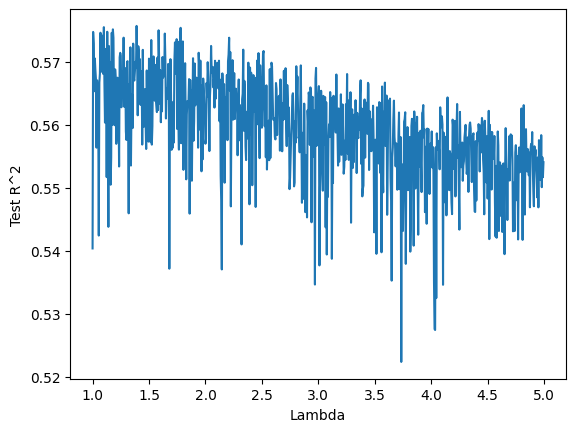

In [16]:
from sklearn.linear_model import HuberRegressor
# HUBER Model with Cross Validation
data = []
for i in np.arange(1,5,0.005):
    temp_model = HuberRegressor(epsilon=20, alpha=i,max_iter=1000)
    cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
    test_fold_r2 = cross_val_score(temp_model, features_matrix, target_array, cv=cross_val, scoring="r2")
    data.append([i, test_fold_r2.mean()])
results_huber = pd.DataFrame(data, columns=['Lambda', "Mean Test R^2"])
plt.plot(results_huber['Lambda'].values, results_huber['Mean Test R^2'].values)
plt.xlabel("Lambda")
plt.ylabel("Test R^2")

results_huber.nlargest(1,"Mean Test R^2")

## RANSAC Regression

,Lambda,Mean Test R^2
71,77.1,0.591392


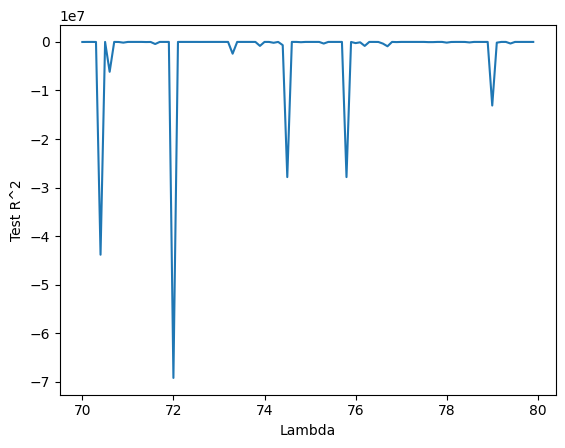

In [27]:
from sklearn.linear_model import RANSACRegressor
# RANSAC Model with Cross Validation
data = []
for i in np.arange(70,80,0.1):
    temp_model = RANSACRegressor(residual_threshold=i)
    cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
    test_fold_r2 = cross_val_score(temp_model, features_matrix, target_array, cv=cross_val, scoring="r2")
    data.append([i, test_fold_r2.mean()])
results_ransac = pd.DataFrame(data, columns=['Lambda', "Mean Test R^2"])
plt.plot(results_ransac['Lambda'].values, results_ransac['Mean Test R^2'].values)
plt.xlabel("Lambda")
plt.ylabel("Test R^2")

results_ransac.nlargest(1,"Mean Test R^2")

## Ridge Regression

,Lambda,Mean Test R^2
0,0,0.591392


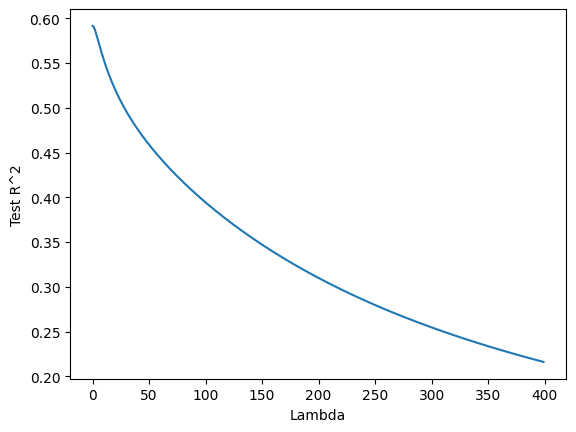

In [33]:
# RIDGE Model with Cross Validation
data = []
for i in np.arange(0,400, 1):
    temp_model = Ridge(i, max_iter=1000)
    cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
    test_fold_r2 = cross_val_score(temp_model, features_matrix, target_array, cv=cross_val, scoring="r2")
    data.append([i, test_fold_r2.mean()])
results_ridge = pd.DataFrame(data, columns=['Lambda', "Mean Test R^2"])
plt.plot(results_ridge['Lambda'].values, results_ridge['Mean Test R^2'].values)
plt.xlabel("Lambda")
plt.ylabel("Test R^2")

results_ridge.nlargest(1,"Mean Test R^2")

In [35]:
pd.concat([results_huber.nlargest(1,"Mean Test R^2"), results_lasso.nlargest(1,"Mean Test R^2"), results_ransac.nlargest(1,"Mean Test R^2"), results_ridge.nlargest(1,"Mean Test R^2")], axis=0)

,Lambda,Mean Test R^2
78,1.39,0.575677
0,0.00,0.591392
71,77.10,0.591392
0,0.00,0.591392
